In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/walmart-store-sales/Walmart_Store_sales.csv


# LOADING DATA

In [2]:
df=pd.read_csv('/kaggle/input/walmart-store-sales/Walmart_Store_sales.csv')
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [3]:
df.isna().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


# EDA

## **Weekly Sales over time**

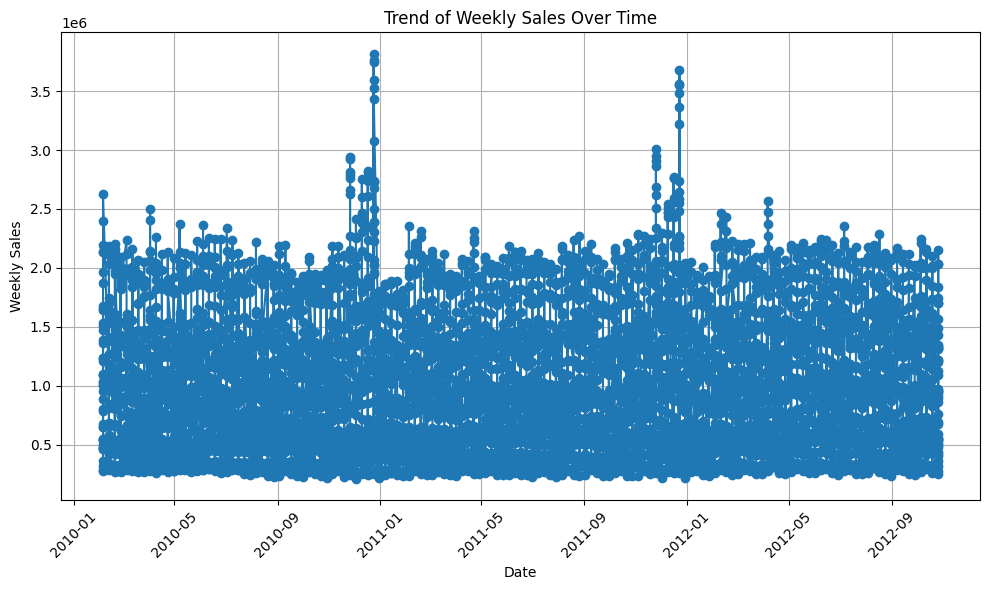

In [5]:

import matplotlib.pyplot as plt


# Convert Date column to datetime format with the correct format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Sort DataFrame by Date
df.sort_values(by='Date', inplace=True)

# Plotting trend of Weekly Sales over time
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Weekly_Sales'], marker='o', linestyle='-')
plt.title('Trend of Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


**Here are some potenial insights**

* The graph shows a clear seasonal pattern with recurring peaks and troughs in weekly sales.

* Sales exhibit significant volatility from week to week, even within the same season.

* While the seasonal trend is consistent, the magnitudes of the peaks vary across different years.

## **Impact of holidays on weekly sales**

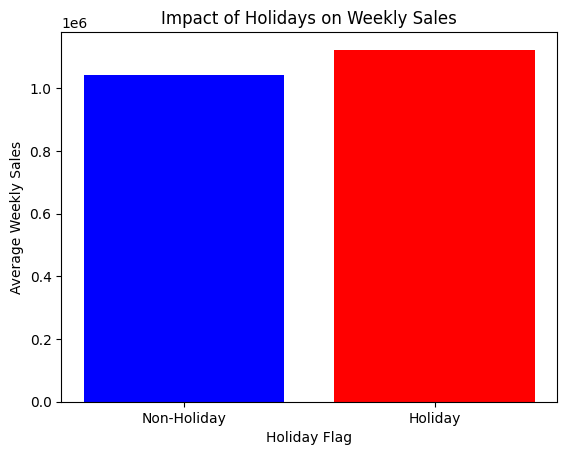

In [6]:

import matplotlib.pyplot as plt


# Convert Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Group by Holiday_Flag and calculate average Weekly_Sales for each group
holiday_sales = df.groupby('Holiday_Flag')['Weekly_Sales'].mean()

# Plotting impact of holidays on weekly sales
plt.bar(['Non-Holiday', 'Holiday'], holiday_sales, color=['blue', 'red'])
plt.title('Impact of Holidays on Weekly Sales')
plt.xlabel('Holiday Flag')
plt.ylabel('Average Weekly Sales')
plt.show()


**Here are some potenial insights**
* It suggests that consumers tend to spend more during holidays, possibly due to increased promotional activities, seasonal demand, and favorable consumer sentiment. Businesses should adapt their marketing and operational strategies to leverage these periods of heightened consumer spending and maximize sales opportunities during holidays.

## **Weather Impact on Weekly Sales**

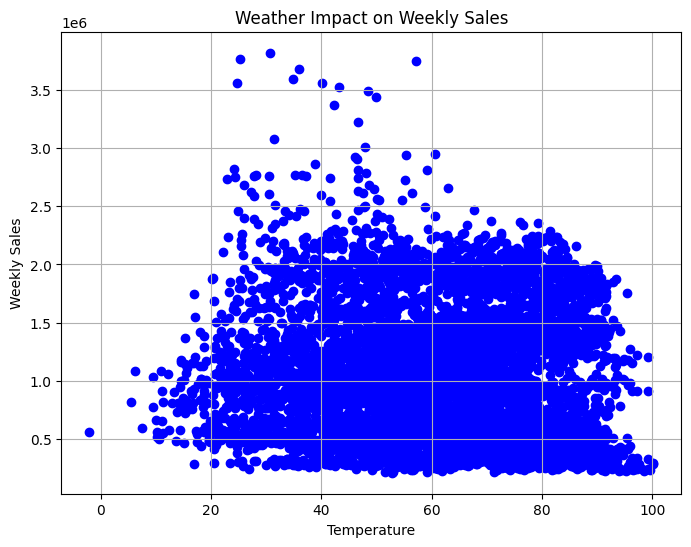

In [7]:

# Plotting Weather Impact on Weekly Sales
plt.figure(figsize=(8, 6))
plt.scatter(df['Temperature'], df['Weekly_Sales'], color='blue')
plt.title('Weather Impact on Weekly Sales')
plt.xlabel('Temperature')
plt.ylabel('Weekly Sales')
plt.grid(True)
plt.show()


**Here are some potenial insights**

* The highest concentration of data points appears to be around temperatures between 50°F and 70°F, suggesting that moderate temperatures may be associated with higher sales volumes.

* There are some outliers with very high sales figures across different temperature ranges, indicating that other factors beyond temperature likely influence sales as well.

* At extremely low and high temperatures (below approximately 20°F and above 80°F), there seems to be a lower density of data points, which could indicate that extreme weather conditions may adversely affect sales.

## **Economic Factors Impact on Weekly Sales**

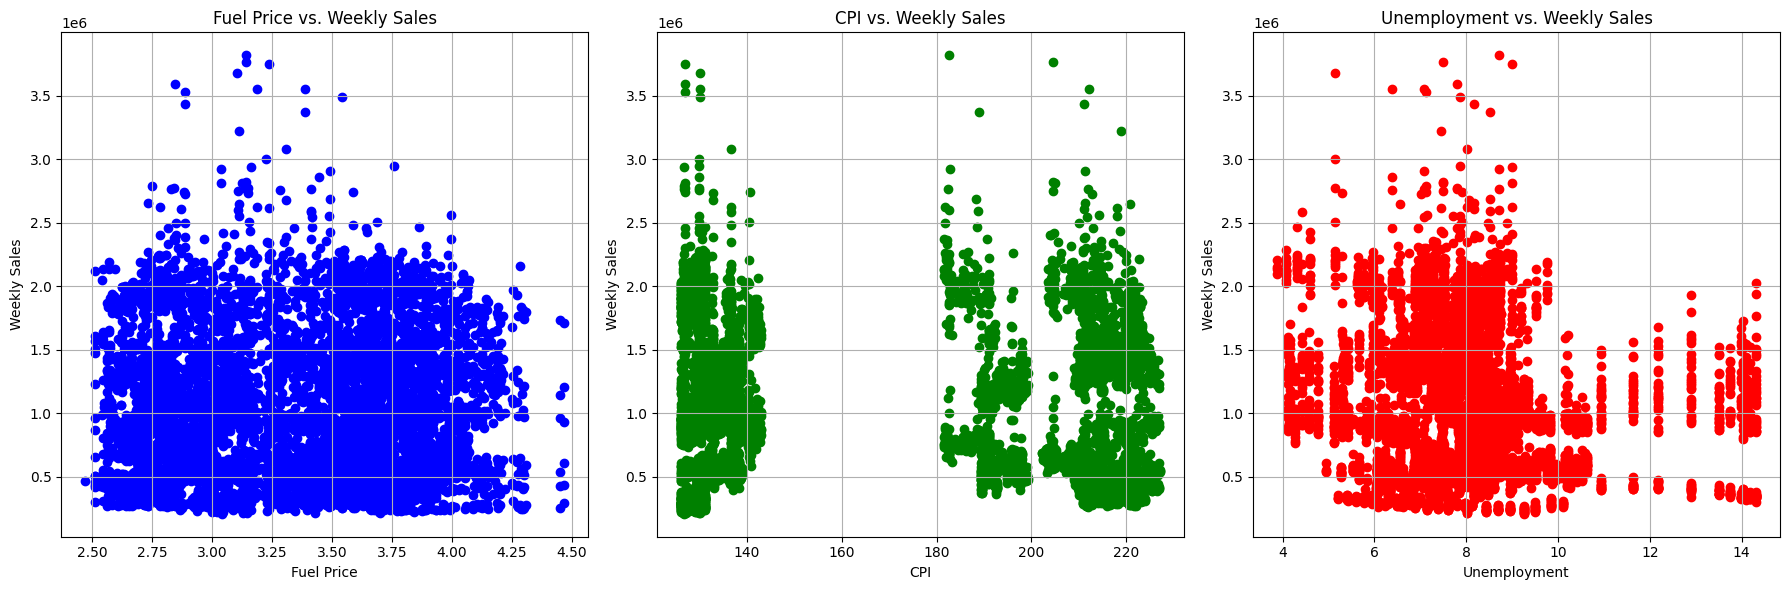

In [8]:


# Plotting Economic Factors Impact on Weekly Sales
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Scatter plot for Fuel Price vs. Weekly Sales
axes[0].scatter(df['Fuel_Price'], df['Weekly_Sales'], color='blue')
axes[0].set_title('Fuel Price vs. Weekly Sales')
axes[0].set_xlabel('Fuel Price')
axes[0].set_ylabel('Weekly Sales')
axes[0].grid(True)

# Scatter plot for CPI vs. Weekly Sales
axes[1].scatter(df['CPI'], df['Weekly_Sales'], color='green')
axes[1].set_title('CPI vs. Weekly Sales')
axes[1].set_xlabel('CPI')
axes[1].set_ylabel('Weekly Sales')
axes[1].grid(True)

# Scatter plot for Unemployment vs. Weekly Sales
axes[2].scatter(df['Unemployment'], df['Weekly_Sales'], color='red')
axes[2].set_title('Unemployment vs. Weekly Sales')
axes[2].set_xlabel('Unemployment')
axes[2].set_ylabel('Weekly Sales')
axes[2].grid(True)

plt.tight_layout()
plt.show()


**Here are some potenial insights**

* Fuel Price vs. Weekly Sales: The scatter plot displays a generally negative correlation between fuel prices and weekly sales. As fuel prices increase, weekly sales tend to decrease, with the highest concentration of data points occurring at lower fuel prices and higher sales. This suggests that higher fuel costs could negatively impact consumer spending and business sales.

* CPI vs. Weekly Sales: The relationship between CPI (a measure of inflation) and weekly sales appears to be relatively weak or inconclusive based on the scattered data points. While there is a slight negative trend, the data points are widely dispersed, indicating that CPI alone may not be a strong predictor of sales performance.

* Unemployment vs. Weekly Sales: The scatter plot shows a clear negative correlation between unemployment rate and weekly sales. As unemployment increases, weekly sales tend to decrease. The data points are more tightly clustered, suggesting a stronger inverse relationship between these two variables. Higher unemployment likely leads to reduced consumer spending and lower business sales.

## **Store Comparison for top 5 stores**

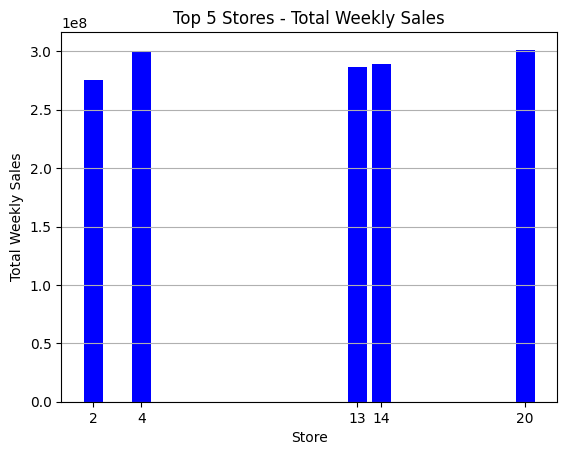

In [9]:
# Group by Store and calculate total Weekly Sales for each store
store_sales = df.groupby('Store')['Weekly_Sales'].sum()

# Select top 5 stores based on total sales
top_5_stores = store_sales.nlargest(5)

# Plotting Store Comparison for top 5 stores
plt.bar(top_5_stores.index, top_5_stores.values, color='blue')
plt.title('Top 5 Stores - Total Weekly Sales')
plt.xlabel('Store')
plt.ylabel('Total Weekly Sales')
plt.xticks(top_5_stores.index)
plt.grid(axis='y')
plt.show()


**Here are some potenial insights**

* Store 4 and Store 20 have the highest total weekly sales among the top 5 stores. Their bars are significantly taller than the others, indicating their superior sales performance.

* Stores 13 and 14 have nearly identical total weekly sales, as indicated by their bars having the same height.

* Store 2, while still among the top 5 performers, has lower total weekly sales compared to the other four stores shown.

## **Yearly Sales for top 5 stores**

/tmp/ipykernel_18/3590779324.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_agg = df.groupby(['Store', pd.Grouper(key='Date', freq='Y')])['Weekly_Sales'].sum().reset_index()


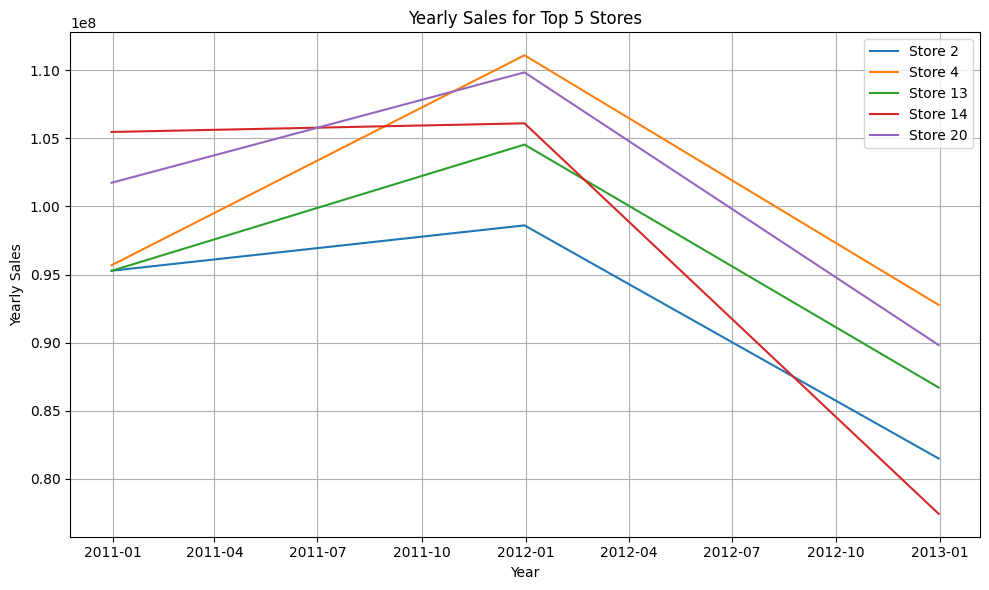

In [10]:
# Group by Store and Date, then sum the Weekly Sales for each Store and Date
df_agg = df.groupby(['Store', pd.Grouper(key='Date', freq='Y')])['Weekly_Sales'].sum().reset_index()

# Sort by Total Yearly Sales and select top 5 stores
top_5_stores = df_agg.groupby('Store')['Weekly_Sales'].sum().nlargest(5).index

# Filter the dataframe to include only data for top 5 stores
df_top_5 = df_agg[df_agg['Store'].isin(top_5_stores)]

# Plotting the Yearly Sales for top 5 stores
plt.figure(figsize=(10, 6))
for store, data in df_top_5.groupby('Store'):
    plt.plot(data['Date'], data['Weekly_Sales'], label=f'Store {store}')

plt.title('Yearly Sales for Top 5 Stores')
plt.xlabel('Year')
plt.ylabel('Yearly Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


**Here are some potenial insights**

* Store 4 consistently had the highest yearly sales throughout the period shown, indicating its strong and stable performance as the top-selling store.

* Store 20 had the second-highest yearly sales, closely following Store 14's performance pattern.

* Stores 13, 14, and 2 exhibited a similar trend, with their yearly sales peaking around mid-2012 and then declining towards the end of the period.

* All five stores experienced a dip in yearly sales around the beginning of 2012, suggesting a potential industry-wide or external factor that impacted sales during that time.

## **Correlation Analysis**

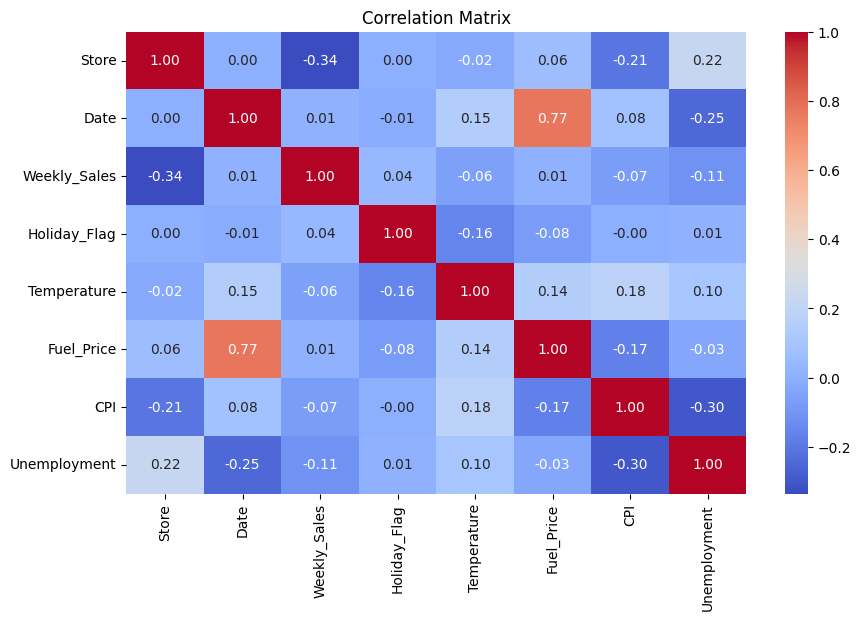

In [11]:

import seaborn as sns

# Compute correlation matrix
correlation_matrix = df.corr()

# Plotting the correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix')
plt.show()


**Here are some potenial insights**

* The correlation matrix shows predominantly weak correlations between the variables. Most correlation coefficients are close to zero, indicating little linear relationship between the variables.

* There are no strong positive or negative correlations between any pair of variables in the dataset. This suggests that the variables may not have strong linear dependencies on each other.

* The weak correlations indicate that individual variables may not be reliable predictors of each other. Therefore, predicting one variable based solely on the others may not yield accurate results.

## **Recommendations**

* To optimize sales performance, businesses should strategically leverage insights gleaned from the analysis. This involves capitalizing on holiday periods by implementing targeted marketing campaigns and promotions to exploit increased consumer spending. 

* Additionally, adapting inventory levels and marketing strategies based on weather forecasts can better align with customer demand, particularly for seasonal items.  

* Monitoring economic indicators such as fuel prices and unemployment rates is crucial for adjusting pricing strategies and mitigating the impact of economic fluctuations on consumer behavior. 